In [1]:
# Test Accuracy = 0.9997

#Preprocessing and combining into one dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

cities = ['Albury.html','BadgerysCreek.html','Cobar.html','CoffsHarbour.html','Moree.html',
 'Newcastle.html','NorahHead.html','NorfolkIsland.html','Penrith.html','Richmond.html',
 'Sydney.html','SydneyAirport.html','WaggaWagga.html', 'Williamtown.html','Wollongong.html',
 'Canberra.html','Tuggeranong.html','MountGinini.html','Ballarat.html',
 'Bendigo.html','Sale.html','MelbourneAirport.html','Melbourne.html','Mildura.html',
 'Nhil.html','Portland.html','Watsonia.html','Dartmoor.html','Brisbane.html','Cairns.html',
 'GoldCoast.html','Townsville.html','Adelaide.html','MountGambier.html','Nuriootpa.html',
 'Woomera.html','Albany.html','Witchcliffe.html','PearceRAAF.html','PerthAirport.html',
 'Perth.html','SalmonGums.html','Walpole.html','Hobart.html','Launceston.html',
 'AliceSprings.html','Darwin.html','Katherine.html','Uluru.html']

df = pd.DataFrame()

count=0
for city in cities:
    count+=1
    filename = r'dataset\\' + str(count) + '- ' + city.strip('.html') + '.csv'
    df_new = pd.read_csv(filename)
    df_new.dropna(subset=['RainToday'],inplace=True)
    df_new.fillna(0.,inplace = True)
    
    df_new.reset_index(inplace=True)
    df_new.drop('index',axis=1,inplace=True)

    number = LabelEncoder()
    df_new['RainToday'] = number.fit_transform(df_new['RainToday'].astype('str'))
    df_new['RainTomorrow'] = number.fit_transform(df_new['RainToday'].astype('str'))
    #RainToday and RainTomorrow: No = 0 ; Yes = 1
    
    direction_labels = [('0.0', 0), ('E', 1), ('ENE', 2), ('ESE', 3), ('N', 4), ('NE', 5), ('NNE', 6), ('NNW', 7), ('NW', 8),
                        ('S', 9), ('SE', 10), ('SSE', 11), ('SSW', 12), ('SW', 13), ('W', 14), ('WNW', 15), ('WSW', 16)]
    
    column = ['WindGustDir','WindDir9am', 'WindDir3pm']
    #Converting categorical data to numeric data
    
    pd.options.mode.chained_assignment = None
    for col in column:
        for k in range(df_new[col].shape[0]):
            for i,j in direction_labels:
                if df_new[col][k] == i:
                    df_new[col].iloc[k] = j
                else:
                    continue
        k=0
        
    print(str(count) + ') ' + df_new['Location'].unique()[0] + ' ...Done')
    df_new['Location'] = count-1
    df = df.append(df_new, ignore_index = True)

1) Albury ...Done
2) BadgerysCreek ...Done
3) Cobar ...Done
4) CoffsHarbour ...Done
5) Moree ...Done
6) Newcastle ...Done
7) NorahHead ...Done
8) NorfolkIsland ...Done
9) Penrith ...Done
10) Richmond ...Done
11) Sydney ...Done
12) SydneyAirport ...Done
13) WaggaWagga ...Done
14) Williamtown ...Done
15) Wollongong ...Done
16) Canberra ...Done
17) Tuggeranong ...Done
18) MountGinini ...Done
19) Ballarat ...Done
20) Bendigo ...Done
21) Sale ...Done
22) MelbourneAirport ...Done
23) Melbourne ...Done
24) Mildura ...Done
25) Nhil ...Done
26) Portland ...Done
27) Watsonia ...Done
28) Dartmoor ...Done
29) Brisbane ...Done
30) Cairns ...Done
31) GoldCoast ...Done
32) Townsville ...Done
33) Adelaide ...Done
34) MountGambier ...Done
35) Nuriootpa ...Done
36) Woomera ...Done
37) Albany ...Done
38) Witchcliffe ...Done
39) PearceRAAF ...Done
40) PerthAirport ...Done
41) Perth ...Done
42) SalmonGums ...Done
43) Walpole ...Done
44) Hobart ...Done
45) Launceston ...Done
46) AliceSprings ...Done
47) Dar

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.drop(['Date'],inplace=True,axis=1)

X = df.drop('RainTomorrow',axis = 1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [3]:
df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
44708,15,9.2,15.8,17.0,2.8,6.3,10,48.0,11,11,...,43.0,1014.2,1015.1,7.0,7.0,11.5,15.0,1,0.0,1
16488,5,6.8,19.8,5.8,0.0,0.0,0,0.0,4,0,...,49.0,0.0,0.0,2.0,2.0,9.8,18.4,1,0.0,1
83820,28,20.0,29.0,0.2,7.4,9.8,16,22.0,16,9,...,40.0,1014.7,1011.8,2.0,3.0,23.7,28.5,0,0.0,0
73875,25,12.2,19.3,0.0,3.6,7.8,14,54.0,4,14,...,82.0,1012.1,1012.7,2.0,7.0,15.3,16.1,0,0.0,0
10347,3,12.2,22.7,0.0,2.0,0.0,5,26.0,0,2,...,48.0,1014.3,1010.5,7.0,1.0,16.0,20.8,0,0.0,0


In [4]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,23.643561,12.144319,23.184454,2.349974,3.152157,4.009764,37.385540,13.885657,18.296199,68.085214,50.169881,918.315669,915.965507,2.774830,2.706606,16.907915,21.288863,0.223423,2.313202,0.223423
std,13.973518,6.431582,7.188909,8.465173,4.173993,4.694015,16.403828,8.934695,9.063283,20.248467,22.053709,302.110370,301.651730,3.132711,3.049890,6.583301,7.472838,0.416541,8.334842,0.416541
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000
25%,11.000000,7.500000,17.900000,0.000000,0.000000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1011.000000,1008.600000,0.000000,0.000000,12.200000,16.300000,0.000000,0.000000,0.000000
50%,24.000000,12.000000,22.600000,0.000000,1.600000,0.300000,37.000000,13.000000,17.000000,70.000000,51.000000,1016.700000,1014.300000,1.000000,1.000000,16.700000,20.900000,0.000000,0.000000,0.000000
75%,36.000000,16.800000,28.200000,0.800000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,0.600000,0.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000


Text(0.5,1,'Temp3pm vs Temp9am')

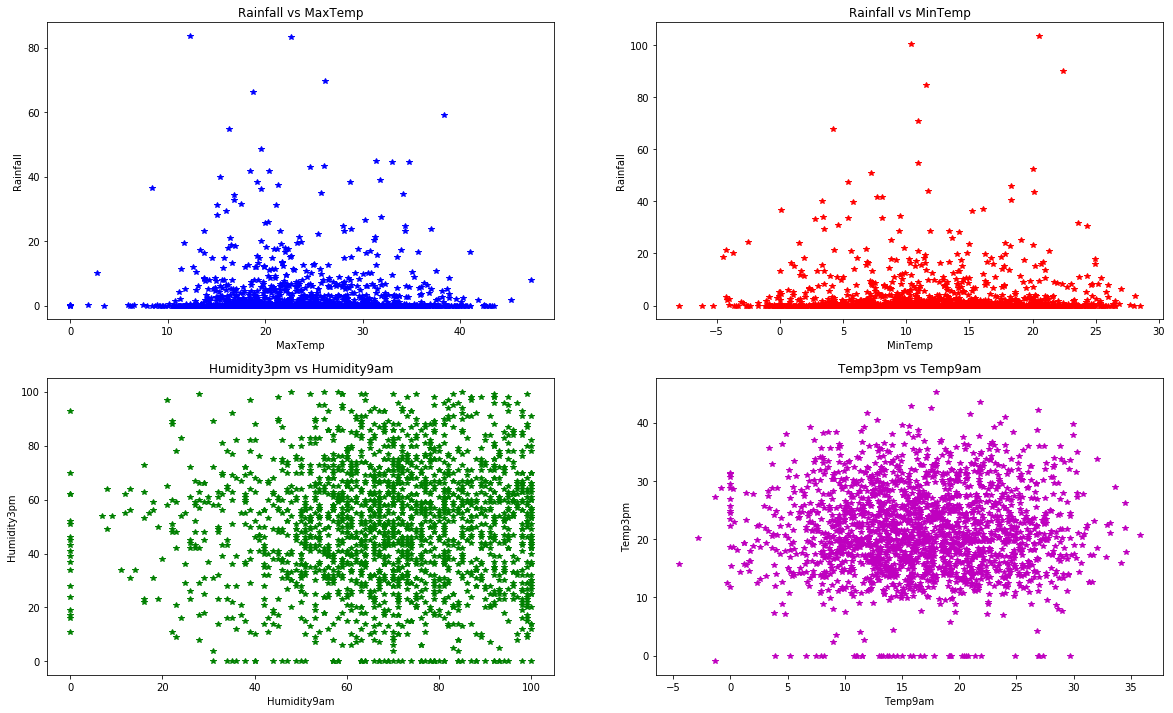

In [5]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.plot(X_train['MaxTemp'].sample(n=2000),X_train['Rainfall'].sample(n=2000),'b*')
plt.xlabel('MaxTemp')
plt.ylabel('Rainfall')
plt.title('Rainfall vs MaxTemp')

plt.subplot(222)
plt.plot(X_train['MinTemp'].sample(n=2000),X_train['Rainfall'].sample(n=2000),'r*')
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')
plt.title('Rainfall vs MinTemp')

plt.subplot(223)
plt.plot(X_train['Humidity9am'].sample(n=2000),X_train['Humidity3pm'].sample(n=2000),'g*')
plt.xlabel('Humidity9am')
plt.ylabel('Humidity3pm')
plt.title('Humidity3pm vs Humidity9am')

plt.subplot(224)
plt.plot(X_train['Temp9am'].sample(n=2000),X_train['Temp3pm'].sample(n=2000),'m*')
plt.xlabel('Temp9am')
plt.ylabel('Temp3pm')
plt.title('Temp3pm vs Temp9am')

G:\himanshu\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


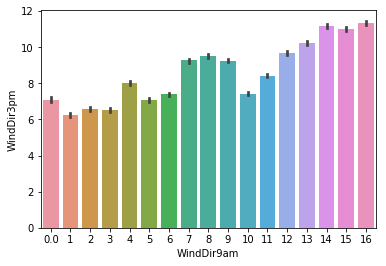

In [6]:
sns.barplot(X_train['WindDir9am'],X_train['WindDir3pm'])

In [7]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
prediction = logmodel.predict(X_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification Report : \n\n',classification_report(y_test,prediction))
print('\n')
print('Confusion Matrix : \n\n',confusion_matrix(y_test,prediction))
print('\n')
print('Test Accuracy =',round(accuracy_score(y_test, prediction),4))

Classification Report : 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00     21882
          1       1.00      1.00      1.00      6276

avg / total       1.00      1.00      1.00     28158



Confusion Matrix : 

 [[21873     9]
 [    0  6276]]


Test Accuracy = 0.9997
